# The Loudness of Spotify Tracks Over Time

## [1] Selected Dataset

[Spotify Dataset 1921-2020, 600k+ Tracks](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks/data?select=tracks.csv)

## [2] Project Description

#### **Problem**
In the modern streaming era, artists are fighting for listeners' limited attention spans. A common theory in the music industry, known as the "Loudness War," suggests that producers have been progressively mixing songs louder to make them stand out on radio and playlists. But is this trend anecdotal, or can it be proven with data? My project investigates the evolution of song loudness over the last century to determine if popular music is statistically getting louder or quieter.

#### **Data**
This project uses the 'Spotify Dataset 1921-2020, 600k+ Tracks' from Kaggle by Yamac Eren Ay (Updated in 2022). By isolating loudness and duration, these song attributes can be analyzed over the course of 100 years.

#### **Methodology**
1. Data Cleaning: Filtering out podcasts, unreasonably long songs, and missing release date information.
2. Exploratory Data Analysis (EDA): Visualizing trends using heatmaps and histograms to identify correlations.
3. Predictive Modeling: Training a simple linear regression model to predict and quantify the rate at which music is getting louder.

## [3] Checking the Data

### [3.1] Summary

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/tracks.csv')

print('Shape is:', df.shape)
df.info(verbose=True)
df.describe()

Shape is: (586672, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 1

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


### [3.2] Cleaning the Dataset

#### [3.2.1] Convert duration from ms (int) to minutes (float)

In [201]:
df['duration_min'] = df['duration_ms'] / 60000

#### [3.2.2] Convert date from string obj to year (int)

In [202]:
# Remove rows without release dates
df = df.dropna(subset=['release_date'])

# Convert ISO8601 date YYYY-MM-DD to just YYYY
df['release_year'] = pd.to_datetime(df['release_date'], format='ISO8601').dt.year

### [3.3] Creating a Subset

In [203]:
# Attempt to trim off excessively long tracks like podcasts

df_sub = df[
    (df['duration_min'] < 15) &
    (df['release_year'] >= 1921)
    ].copy()

df_sub.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 584576 entries, 0 to 586671
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                584576 non-null  object 
 1   name              584505 non-null  object 
 2   popularity        584576 non-null  int64  
 3   duration_ms       584576 non-null  int64  
 4   explicit          584576 non-null  int64  
 5   artists           584576 non-null  object 
 6   id_artists        584576 non-null  object 
 7   release_date      584576 non-null  object 
 8   danceability      584576 non-null  float64
 9   energy            584576 non-null  float64
 10  key               584576 non-null  int64  
 11  loudness          584576 non-null  float64
 12  mode              584576 non-null  int64  
 13  speechiness       584576 non-null  float64
 14  acousticness      584576 non-null  float64
 15  instrumentalness  584576 non-null  float64
 16  liveness          584576 

## [4] Visualize the Data

### [4.1] Average Popularity by Loudness (Bar Chart)

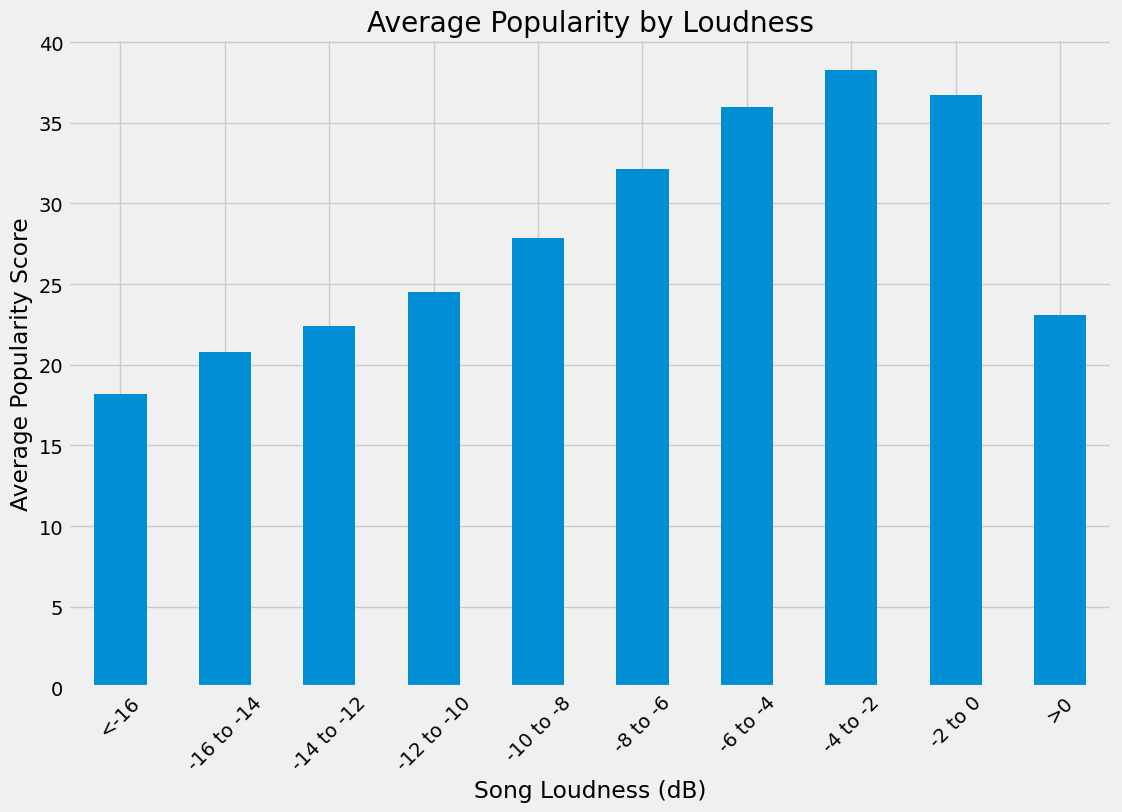

In [204]:
# Define bins
loudness_bins = [-20, -16, -14, -12, -10, -8, -6, -4, -2, 0, 15]
loudness_labels = ['<-16', '-16 to -14', '-14 to -12', '-12 to -10', '-10 to -8', '-8 to -6', '-6 to -4', '-4 to -2', '-2 to 0', '>0']
df_sub['loudness_bin'] = pd.cut(df_sub['loudness'], bins=loudness_bins, labels=loudness_labels)

# Create bar chart data
average_popularity_by_year = df_sub.groupby('loudness_bin', observed=True)['popularity'].mean()

plt.figure(figsize=(12, 8))
average_popularity_by_year.plot(kind='bar')
plt.title('Average Popularity by Loudness')
plt.xlabel('Song Loudness (dB)')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45)
plt.show()

### [4.2] Average Popularity by Length (Bar Chart)

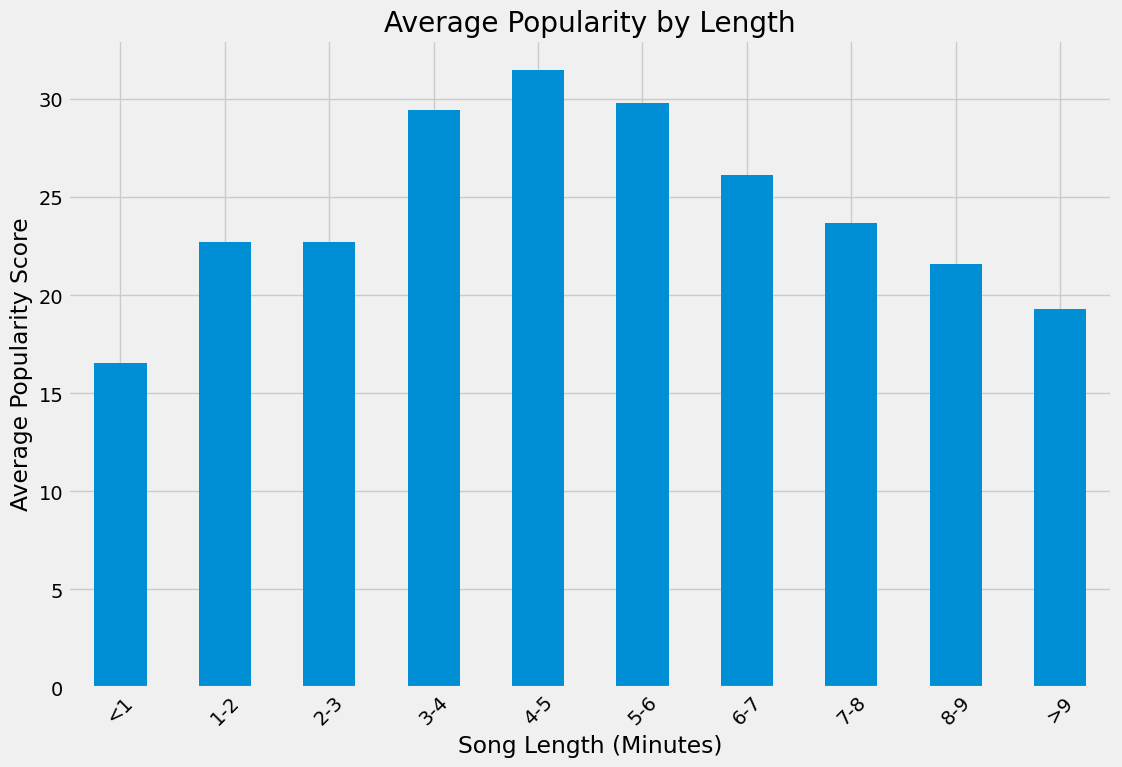

In [205]:
# Change style of Matplotlib
plt.style.use('fivethirtyeight')

# Define bins
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15]
labels = ['<1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '>9']
df_sub['duration_bin'] = pd.cut(df_sub['duration_min'], bins=bins, labels=labels)

# Create bar chart data
average_popularity_by_year = df_sub.groupby('duration_bin', observed=True)['popularity'].mean()

plt.figure(figsize=(12, 8))
average_popularity_by_year.plot(kind='bar')
plt.title('Average Popularity by Length')
plt.xlabel('Song Length (Minutes)')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45)
plt.show()

### [4.3] History of Song Loudness (Line Plot)

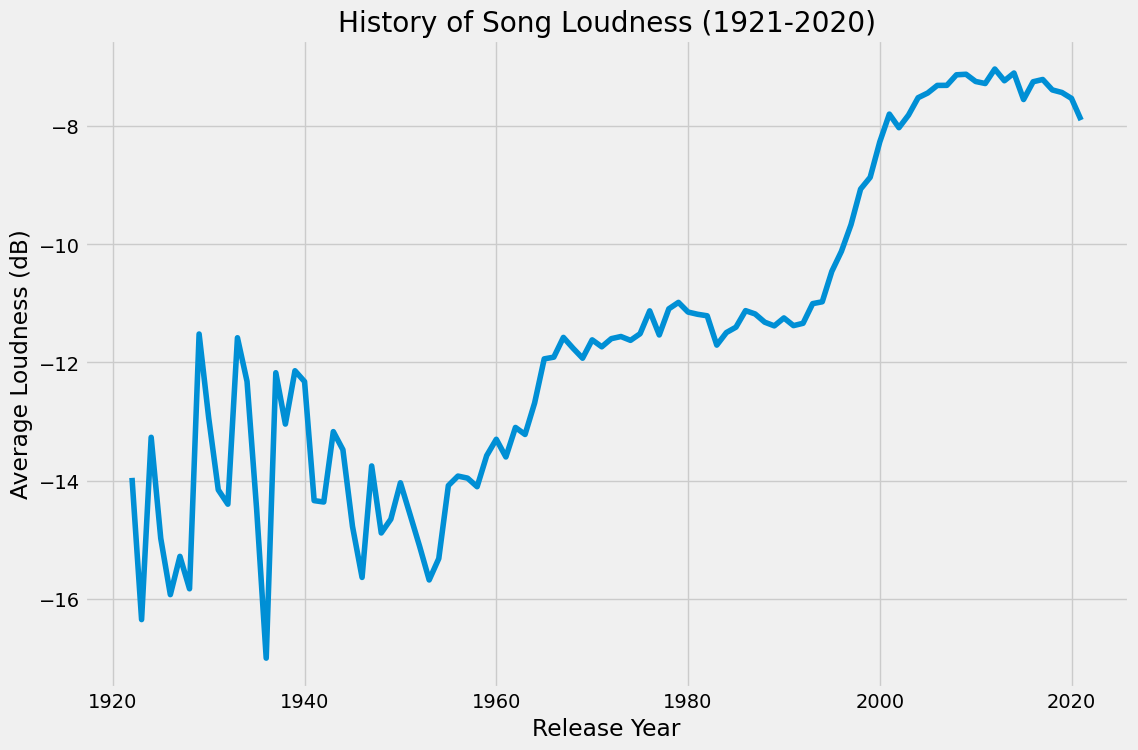

In [206]:
# Group by year to get trend of song length
average_length_by_year = df_sub.groupby('release_year')['loudness'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_length_by_year.index, average_length_by_year.values)
plt.title('History of Song Loudness (1921-2020)')
plt.xlabel('Release Year')
plt.ylabel('Average Loudness (dB)')
plt.show()

### [4.4] History of Song Length (Line Plot)

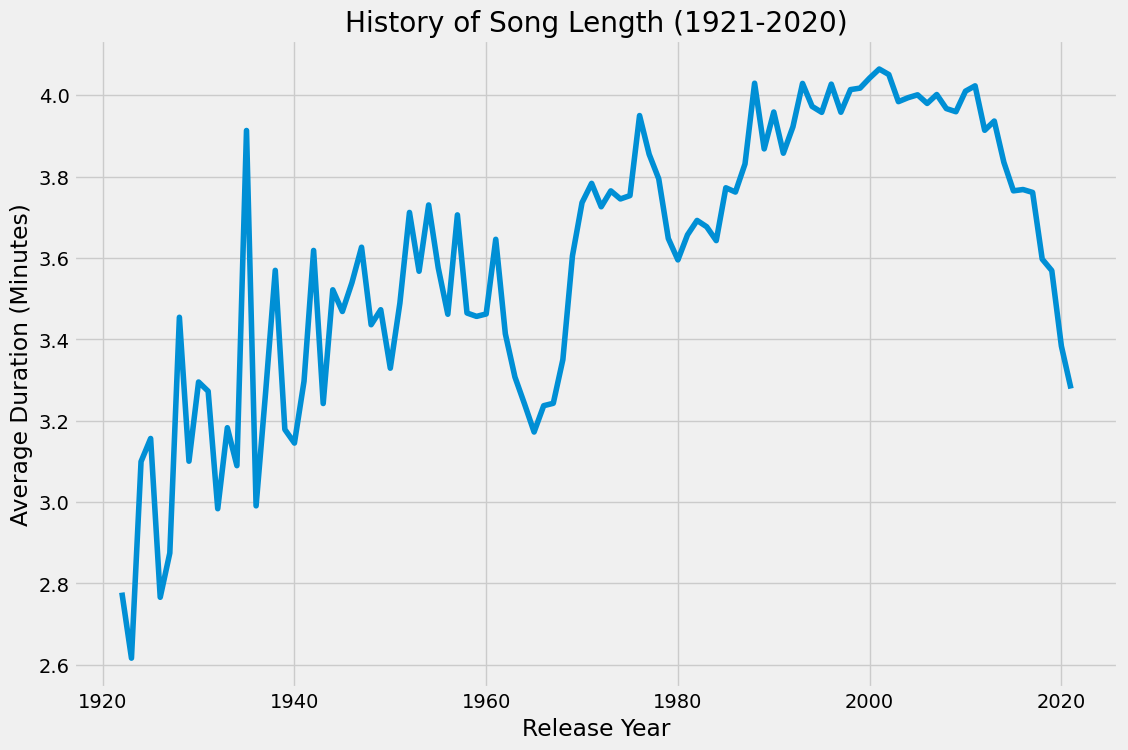

In [218]:
# Group by year to get trend of song length
average_length_by_year = df_sub.groupby('release_year')['duration_min'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_length_by_year.index, average_length_by_year.values)
plt.title('History of Song Length (1921-2020)')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (Minutes)')
plt.show()

### [4.5] Correlation Heatmap

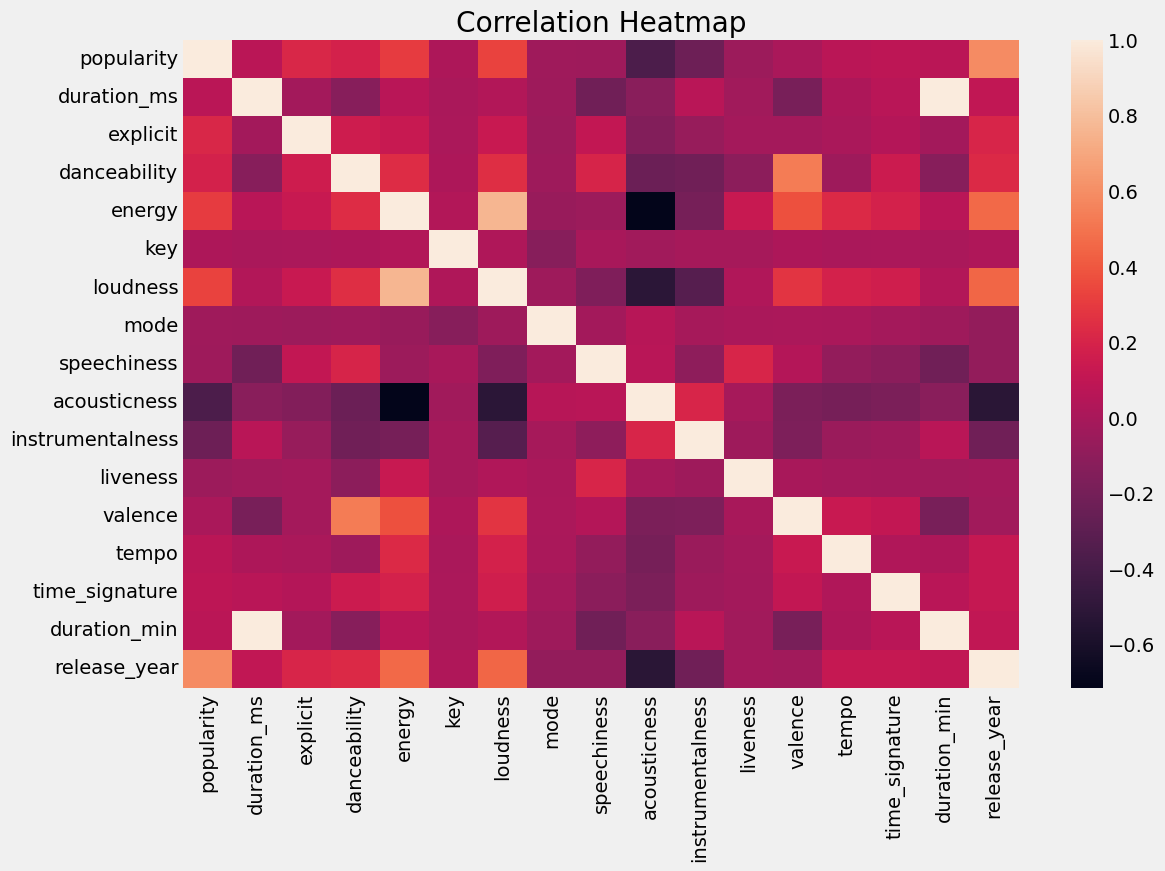

In [208]:
# Using only numeric columns
corr_matrix = df_sub.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix)
plt.title('Correlation Heatmap')
plt.show()

## [5] Train and Test Regression Model

### [5.1] Simple Linear Regression Model

I observed a strong positive correlation between release_year and loudness in my heatmap analysis. To quantify this relationship, I selected a Simple Linear Regression model. I will use release_year as my predictor, and loudness as my target.

I used [this](https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4/) guide to help me build the simple linear regression model.

### [5.2] Create Train and Test Sets

In [209]:
from sklearn.model_selection import train_test_split

# Creating X and y
X = df_sub['release_year']
y = df_sub['loudness']

# Splitting the variables as training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# print('X_train: \n', X_train, '\n')
# print('y_train: \n', y_train, '\n')
# print('X_test: \n', X_test, '\n')
# print('y_test: \n', y_test, '\n')

In [210]:
# Shape of the train set without adding column
X_train.shape
print('Before:', X_train.shape)

# Adding additional column to the train and test data
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

print('After:', X_train.shape)

Before: (409203,)
After: (409203, 1)


### [5.3] Building and Training the Model

In [211]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train, y_train)

print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : -208.18548049738712
Slope : [0.09956473]


### [5.4] Evaluating the Model

In [212]:
from sklearn.metrics import r2_score

# Making Predictions of y_value
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Comparing the r2 value of both train and test data
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

if abs(r2_train - r2_test) / r2_test < 0.05:
    print(f'R2 train score is: {r2_train:.4f}, R2 test score is: {r2_test:.4f}')
    print('R2 score of train and test data is within 5%; We can conclude that the model is pretty stable.')

R2 train score is: 0.1998, R2 test score is: 0.1997
R2 score of train and test data is within 5%; We can conclude that the model is pretty stable.


In [213]:
year_to_predict = [[2030]]

predicted_loudness = lm.predict(year_to_predict)

print(f"Predicted average loudness for a song in 2030: {predicted_loudness[0]:.2f} dB")


Predicted average loudness for a song in 2030: -6.07 dB


### [5.5] Visualizing the Model

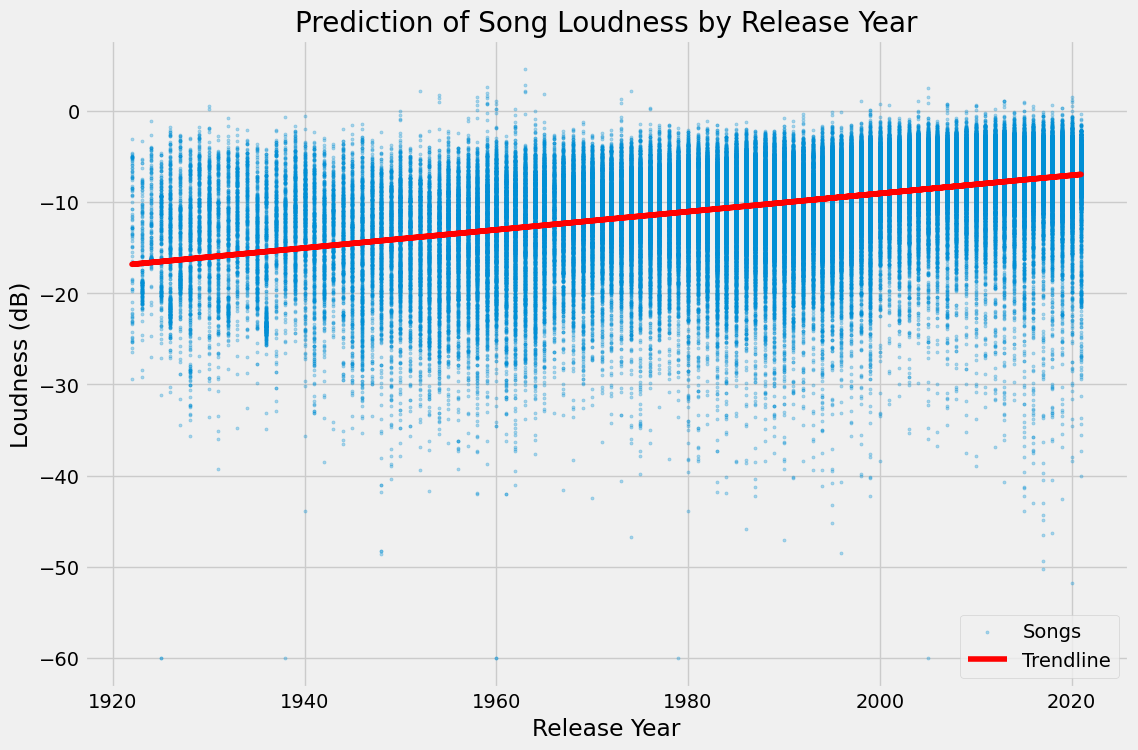

In [214]:
# Visualize the line on the test set
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, alpha=0.3, s=5, label='Songs')
plt.plot(X_test, y_test_pred, 'r', label='Trendline')
plt.xlabel('Release Year')
plt.ylabel('Loudness (dB)')
plt.title('Prediction of Song Loudness by Release Year')
plt.legend()
plt.show()

### [6] Conclusion

#### **Summary**
This project confirms the "Loudness War" hypothesis: popular music has become significantly louder over the last century. The EDA revealed a consistent upward trend in song volume from 1921 to 2020, with tracks steadily approaching a maximum of 0dB. Additionally, a strong positive correlation was observed between release_year and loudness, while song duration has notably decreased since 2000, reflecting the influence of streaming economics.

#### **Model Usage**
Using Simple Linear Regression, the growth of loudness can be quantified, proving that release time is a statistically significant predictor of loudness. The model successfully captures the general historical trend and predicts that music will continue to get louder in the near future.

#### **Limitations**
The limitations of the model are that it assumes a linear increase that ignores the physical 0dB limit of digital audio, meaning it cannot account for the 'flattening' of the curve as music hits maximum volume. Despite this limitation, the analysis provides evidence that current music is louder than the music of the past.